# Explore here

### Paso 1: Cargar el conjunto de datos

In [5]:
import pandas as pd

# Carga directa desde la URL
url = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"
total_data = pd.read_csv(url, parse_dates=['date'], index_col='date')

df.head()


,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633


### Paso 2: Construcción y análisis de la serie temporal

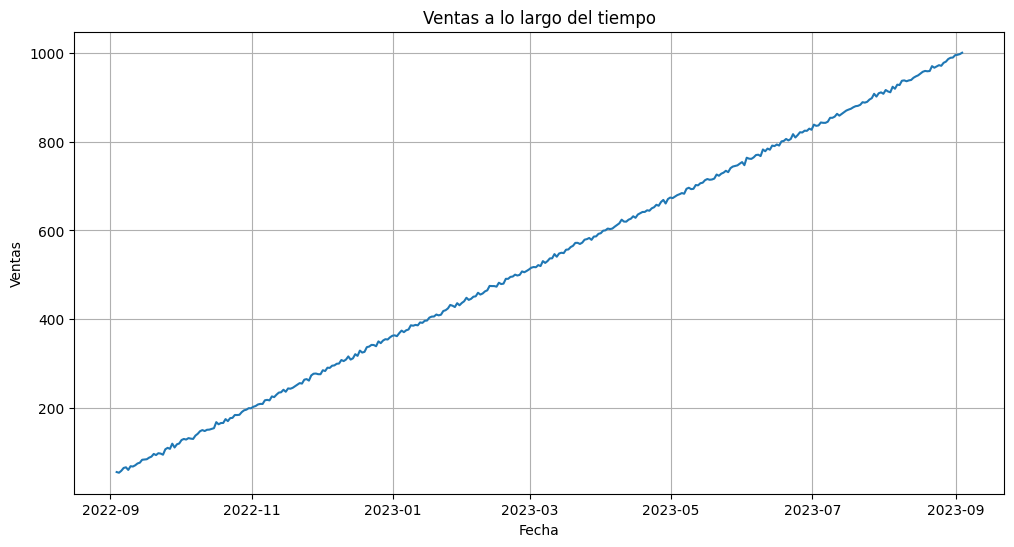

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizamos la serie temporal
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_data, x=total_data.index, y='sales')
plt.title('Ventas a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid()
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(total_data['sales'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(total_data['sales'], model='additive', period=12)
decomposition.plot()
plt.tight_layout()
plt.show()


###  Paso 3: Entrenamiento del modelo ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Si no es estacionaria, aplicar transformaciones como diferencia
Total_data_diff = total_data['sales'].diff().dropna()

# Entrenamiento - ajustar manualmente los parámetros (p,d,q) o usar auto_arima (opcional con pmdarima)
model = ARIMA(total_data['sales'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

### Paso 4: Predicción y evaluación

In [ ]:
# División (por ejemplo, 80% entrenamiento, 20% test)
train_size = int(len(total_data) * 0.8)
train, test = total_data['sales'][:train_size], total_data['sales'][train_size:]

model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

# Predicción
forecast = model_fit.forecast(steps=len(test))

# Visualizar predicción vs datos reales
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Real')
plt.plot(test.index, forecast, label='Predicción')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test, forecast)
print(f"MSE: {mse:.2f}")


### Paso 5: Guardar el modelo

In [ ]:
import joblib

joblib.dump(model_fit, 'modelo_arima_ventas.pkl')